In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def train_model(dataset, model_type='svm', **kwargs):
    """
    Funkcja trenująca model na podstawie podanego zbioru danych i modelu.

    Args:
        dataset: Ramka danych zawierająca cechy i etykiety.
        model_type: Typ modelu do wytrenowania ('svm' dla SVM, 'logistic' dla regresji logistycznej, 'xgboost' dla XGBoost).
        **kwargs: Dodatkowe argumenty przekazywane do konstruktora modelu.

    Returns:
        model: Wytrenowany model.
        accuracy: Dokładność modelu na zestawie testowym.
    """
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == 'svm':
        model = SVC(**kwargs)
    elif model_type == 'logistic':
        model = LogisticRegression(**kwargs)
    elif model_type == 'xgboost':
        model = xgb.XGBClassifier(**kwargs)

    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    print(train_time)

    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    end_predict_time = time.time()
    predict_time = end_predict_time - start_predict_time
    print(predict_time)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, precision, recall, cm

## Diabetes

In [ ]:
# Zaimportuj dane diabetes
diabetes = pd.read_csv("diabetes_data.csv")

# Wytrenuj modele SVM, regresji logistycznej i XGBoost za pomocą funkcji
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(diabetes, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(diabetes, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(diabetes, model_type='xgboost')

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej: ", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej: ", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej: ", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)


141.41469383239746
43.597901821136475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7265067100524902
0.0031714439392089844
1.0489850044250488
0.026665449142456055
Dokładność modelu SVM: 0.7482848857769291
Dokładność modelu regresji logistycznej:  0.7430511351580734
Dokładność modelu XGBoost: 0.7488506966546432
Precyzja modelu SVM: 0.7212221095334685
Precyzja modelu regresji logistycznej:  0.7262251655629139
Precyzja modelu XGBoost: 0.7285079696890515
Czułość modelu SVM: 0.8070648318910484
Czułość modelu regresji logistycznej:  0.7778408284863101
Czułość modelu XGBoost: 0.7910341892467017
Macierz pomyłek modelu SVM:  [[4891 2199]
 [1360 5689]]
Macierz pomyłek regresji logistycznej:  [[5023 2067]
 [1566 5483]]
Macierz pomyłek modelu XGBoost:  [[5012 2078]
 [1473 5576]]


## Hypertension

In [ ]:
# Zaimportuj dane hypertension
hypertension = pd.read_csv("hypertension_data.csv")
NaN_count = hypertension.isna().sum()
hypertension = hypertension.dropna()

# Wytrenuj modele SVM, regresji logistycznej i XGBoost za pomocą funkcji
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(hypertension, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(hypertension, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(hypertension, model_type='xgboost')

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)


21.82962703704834
3.4330172538757324


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.20903754234313965
0.0035986900329589844
0.2619292736053467
0.012884855270385742
Dokładność modelu SVM: 0.7536454336147352
Dokładność modelu regresji logistycznej: 0.8451650038372985
Dokładność modelu XGBoost: 1.0
Precyzja modelu SVM: 0.7468548634550476
Precyzja modelu regresji logistycznej: 0.8288146279949559
Precyzja modelu XGBoost: 1.0
Czułość modelu SVM: 0.841341168337366
Czułość modelu regresji logistycznej: 0.908745247148289
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[1494  825]
 [ 459 2434]]
Macierz pomyłek regresji logistycznej:  [[1776  543]
 [ 264 2629]]
Macierz pomyłek modelu XGBoost:  [[2319    0]
 [   0 2893]]


## Stroke

In [ ]:
stroke = pd.read_csv("stroke_data.csv")
NaN_count = stroke.isna().sum()
stroke = stroke.dropna()

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(stroke, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(stroke, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(stroke, model_type='xgboost')


print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

42.90097689628601
10.180341482162476


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.31616663932800293
0.002446413040161133
0.2990376949310303
0.016180992126464844
Dokładność modelu SVM: 0.651185529210462
Dokładność modelu regresji logistycznej: 0.678196040087998
Dokładność modelu XGBoost: 0.9973111708628697
Precyzja modelu SVM: 0.7076502732240437
Precyzja modelu regresji logistycznej: 0.702451394759087
Precyzja modelu XGBoost: 0.9946236559139785
Czułość modelu SVM: 0.509090909090909
Czułość modelu regresji logistycznej: 0.6125307125307126
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[3256  856]
 [1998 2072]]
Macierz pomyłek regresji logistycznej:  [[3056 1056]
 [1577 2493]]
Macierz pomyłek modelu XGBoost:  [[4090   22]
 [   0 4070]]


Strojenie hiperparaemtrów - GridSearchCV

In [ ]:
def tune_svm_model(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_svm_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_svm_model, recall

def tune_logistic_regression(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
    logistic = LogisticRegression(max_iter=1000)
    grid_search = GridSearchCV(logistic, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_logistic_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_logistic_model, recall

def tune_xgboost_model(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9],
        'colsample_bytree': [0.5, 0.7, 0.9]
    }
    xgboost = xgb.XGBClassifier()
    grid_search = GridSearchCV(xgboost, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_xgboost_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_xgboost_model, recall

In [ ]:
diabetes = pd.read_csv("diabetes_data.csv")
# Zaimportuj dane hypertension
hypertension = pd.read_csv("hypertension_data.csv")
NaN_count = hypertension.isna().sum()
hypertension = hypertension.dropna()
stroke = pd.read_csv("stroke_data.csv")
NaN_count = stroke.isna().sum()
stroke = stroke.dropna()
# best_svm_diabetes, accuracy_svm_diabetes = tune_svm_model(diabetes)
best_logistic_diabetes, accuracy_logistic_diabetes = tune_logistic_regression(diabetes)
print(best_logistic_diabetes, accuracy_logistic_diabetes)
best_xgboost_diabetes, accuracy_xgboost_diabetes = tune_xgboost_model(diabetes)
print(best_xgboost_diabetes, accuracy_xgboost_diabetes)

# best_svm_hypertension, accuracy_svm_hypertension = tune_svm_model(hypertension)
best_logistic_hypertension, accuracy_logistic_hypertension = tune_logistic_regression(hypertension)
print(best_logistic_hypertension, accuracy_logistic_hypertension)
best_xgboost_hypertension, accuracy_xgboost_hypertension = tune_xgboost_model(hypertension)
print(best_xgboost_hypertension, accuracy_xgboost_hypertension)

# best_svm_stroke, accuracy_svm_stroke = tune_svm_model(stroke)
best_logistic_stroke, accuracy_logistic_stroke = tune_logistic_regression(stroke)
print(best_logistic_stroke, accuracy_logistic_stroke)
best_xgboost_stroke, accuracy_xgboost_stroke = tune_xgboost_model(stroke)
print(best_xgboost_stroke, accuracy_xgboost_stroke)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear') 0.7682085710147014
LogisticRegression(C=1, max_iter=1000, solver='liblinear') 0.9257533703731449
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 1.0
LogisticRegression(C=0.1, max_iter=1000) 0.6178768890000229
XGBClassifier(base_score=No

After gridSearchCV

In [ ]:
# Zaimportuj dane diabetes
diabetes = pd.read_csv("diabetes_data.csv")

# Wytrenuj modele SVM, regresji logistycznej i XGBoost za pomocą funkcji
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(diabetes, model_type='svm', kernel='rbf', C=1.0)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(diabetes, model_type='logistic', C=0.1, max_iter=1000, solver='liblinear')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(diabetes, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=1, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej: ", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej: ", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej: ", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

114.05817151069641
25.586582899093628
0.2712438106536865
0.002963542938232422
0.7414591312408447
0.03500509262084961
Dokładność modelu SVM: 0.7482848857769291
Dokładność modelu regresji logistycznej:  0.7467996322229294
Dokładność modelu XGBoost: 0.7490628757337859
Precyzja modelu SVM: 0.7212221095334685
Precyzja modelu regresji logistycznej:  0.7344235707528044
Precyzja modelu XGBoost: 0.7290331021850058
Czułość modelu SVM: 0.8070648318910484
Czułość modelu regresji logistycznej:  0.77088948787062
Czułość modelu XGBoost: 0.7904667328699106
Macierz pomyłek modelu SVM:  [[4891 2199]
 [1360 5689]]
Macierz pomyłek regresji logistycznej:  [[5125 1965]
 [1615 5434]]
Macierz pomyłek modelu XGBoost:  [[5019 2071]
 [1477 5572]]


In [21]:
accuracy_diabetes = [0.7482848857769291, 0.7440413041940731, 0.7488506966546432, 0.7482848857769291, 0.7467996322229294, 0.7490628757337859]
precision_diabetes = [0.7212221095334685, 0.7262251655629139, 0.7285079696890515, 0.7212221095334685, 0.7344235707528044, 0.7290331021850058]
recall_diabetes = [0.8070648318910484, 0.7778408284863101, 0.7910341892467017, 0.8070648318910484, 0.77088948787062, 0.7904667328699106]
matrix_svm_before_diabetes = [[4891, 2199], [1360, 5689]]
matrix_log_before_diabetes =  [[5023, 2067], [1566, 5483]]
matrix_xgb_before_diabetes = [[5012, 2078], [1473, 5576]]
matrix_svm_after_diabetes = [[4891, 2199], [1360, 5689]]
matrix_log_after_diabetes = [[5125, 1965],[1615, 5434]]
matrix_xgb_after_diabetes = [[5019, 2071],[1477, 5572]]

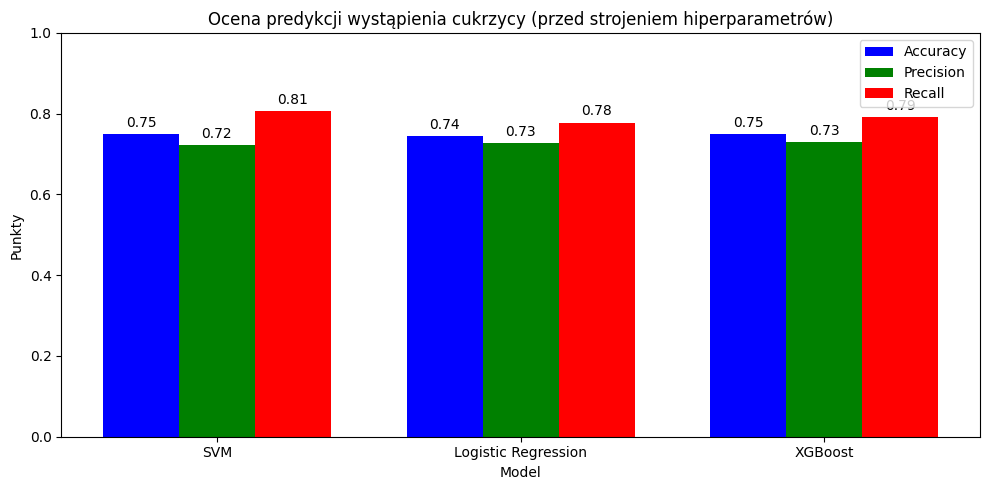

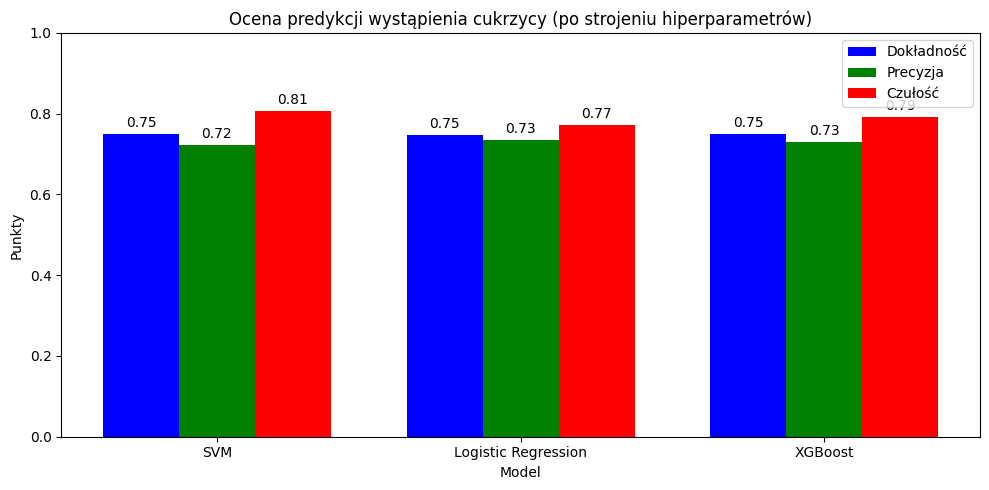

In [22]:
# Etykiety osi X
x_labels_before = ['SVM', 'Logistic Regression', 'XGBoost']
x_labels_after = ['SVM', 'Logistic Regression', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_diabetes[0:3]
accuracy_after = accuracy_diabetes[3:6]

precision_before = precision_diabetes[0:3]
precision_after = precision_diabetes[3:6]

recall_before = recall_diabetes[0:3]
recall_after = recall_diabetes[3:6]

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Accuracy', color='b')
rects2 = ax.bar(x, precision_before, width, label='Precision', color='g')
rects3 = ax.bar(x + width, recall_before, width, label='Recall', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia cukrzycy (przed strojeniem hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='b')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='g')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia cukrzycy (po strojeniu hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

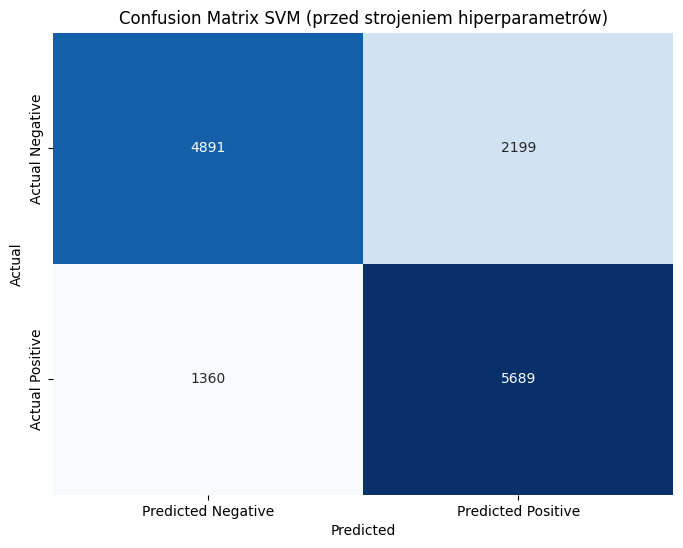

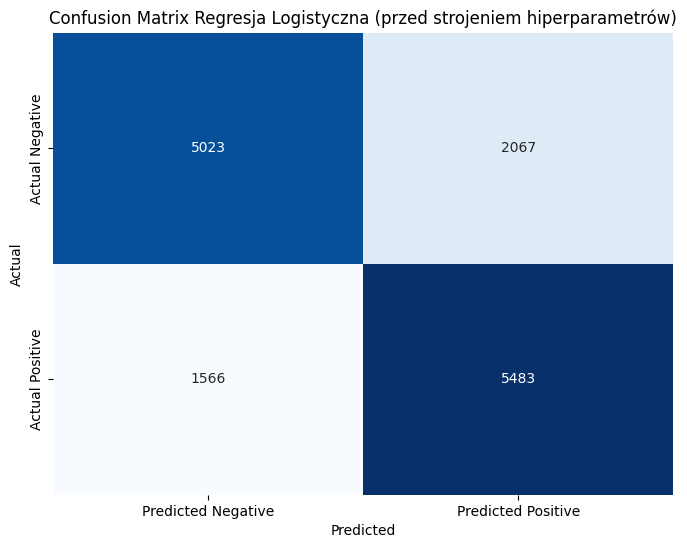

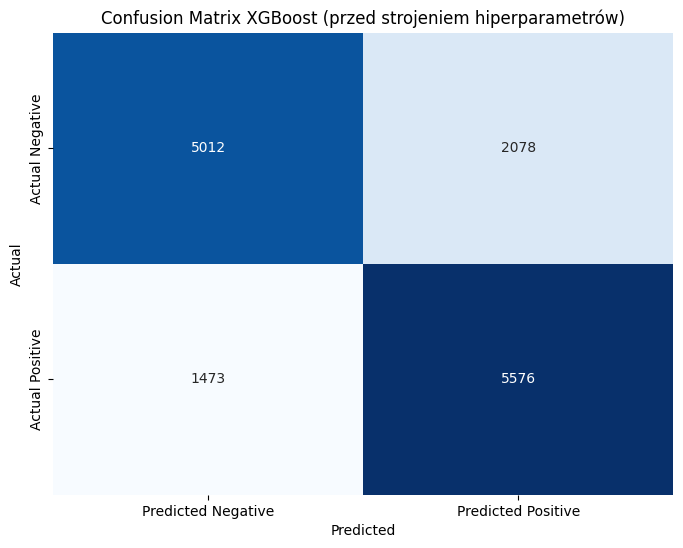

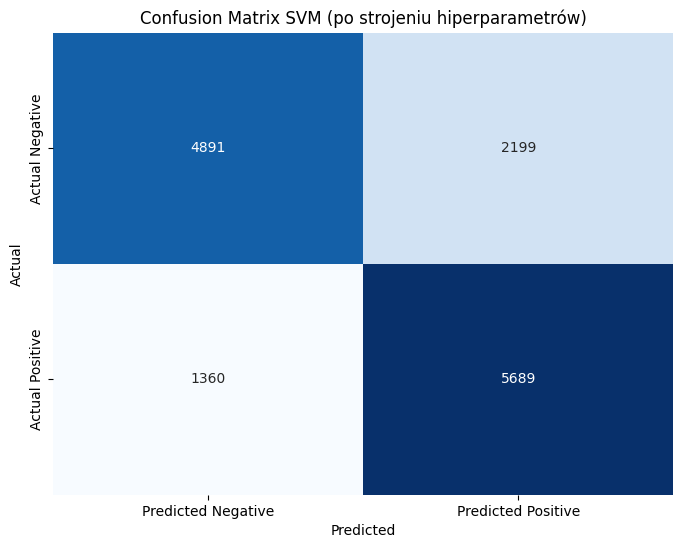

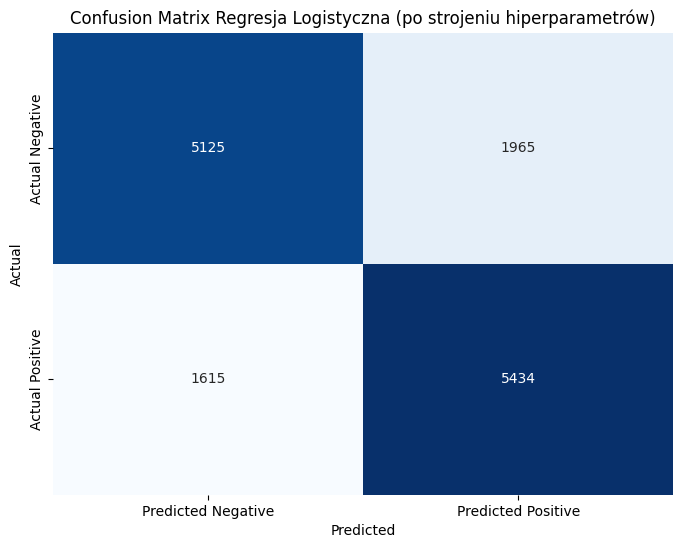

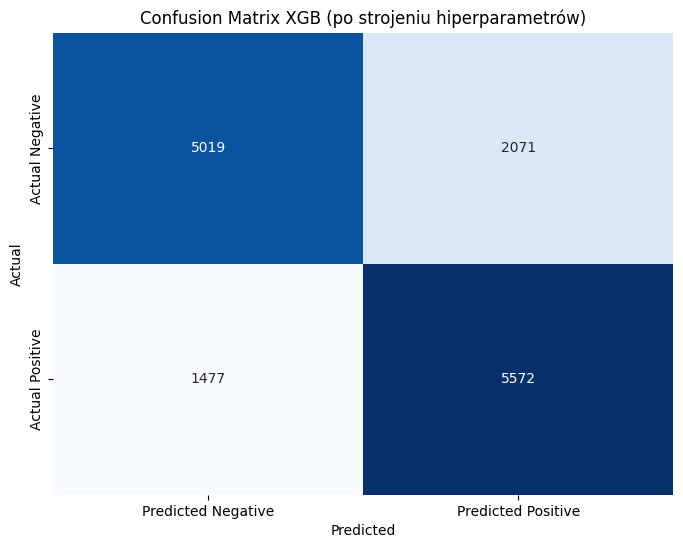

In [23]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
plot_confusion_matrix(matrix_svm_before_diabetes, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_log_before_diabetes, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_xgb_before_diabetes, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
plot_confusion_matrix(matrix_svm_after_diabetes, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_log_after_diabetes, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_xgb_after_diabetes, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')

In [ ]:
# Zaimportuj dane hypertension
hypertension = pd.read_csv("hypertension_data.csv")
NaN_count = hypertension.isna().sum()
hypertension = hypertension.dropna()

# Wytrenuj modele SVM, regresji logistycznej i XGBoost za pomocą funkcji
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(hypertension, model_type='svm', kernel='rbf', C=1.0)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(hypertension, model_type='logistic', C=1, max_iter=1000, solver='liblinear')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(hypertension, model_type='xgboost', learning_rate=0.03, max_depth=5, min_child_weight=1, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

17.944234371185303
3.5034098625183105
0.12894177436828613
0.002541065216064453
0.27523350715637207
0.010509014129638672
Dokładność modelu SVM: 0.7536454336147352
Dokładność modelu regresji logistycznej: 0.8570606293169608
Dokładność modelu XGBoost: 0.9781273983115887
Precyzja modelu SVM: 0.7468548634550476
Precyzja modelu regresji logistycznej: 0.8394437420986094
Precyzja modelu XGBoost: 0.9620884602593948
Czułość modelu SVM: 0.841341168337366
Czułość modelu regresji logistycznej: 0.9180781195990322
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[1494  825]
 [ 459 2434]]
Macierz pomyłek regresji logistycznej:  [[1811  508]
 [ 237 2656]]
Macierz pomyłek modelu XGBoost:  [[2205  114]
 [   0 2893]]


In [17]:
accuracy_hypertension = [0.7536454336147352, 0.8451650038372985, 1.0, 0.7536454336147352, 0.8570606293169608, 0.9781273983115887]
precision_hypertension = [0.7468548634550476, 0.8288146279949559, 1.0, 0.7468548634550476, 0.8394437420986094, 0.9620884602593948]
recall_hypertension = [0.841341168337366, 0.908745247148289, 1.0, 0.841341168337366, 0.9180781195990322, 1.0]
matrix_svm_before_hypertension = [[1494,  825], [ 459, 2434]]
matrix_log_before_hypertension = [[1776,  543], [264, 2629]]
matrix_xgb_before_hypertension = [[2319,    0], [0, 2893]]
matrix_svm_after_hypertension = [[1494,  825], [459, 2434]]
matrix_log_after_hypertension = [[1811,  508], [237, 2656]]
matrix_xgb_after_hypertension = [[2205,  114], [0, 2893]]

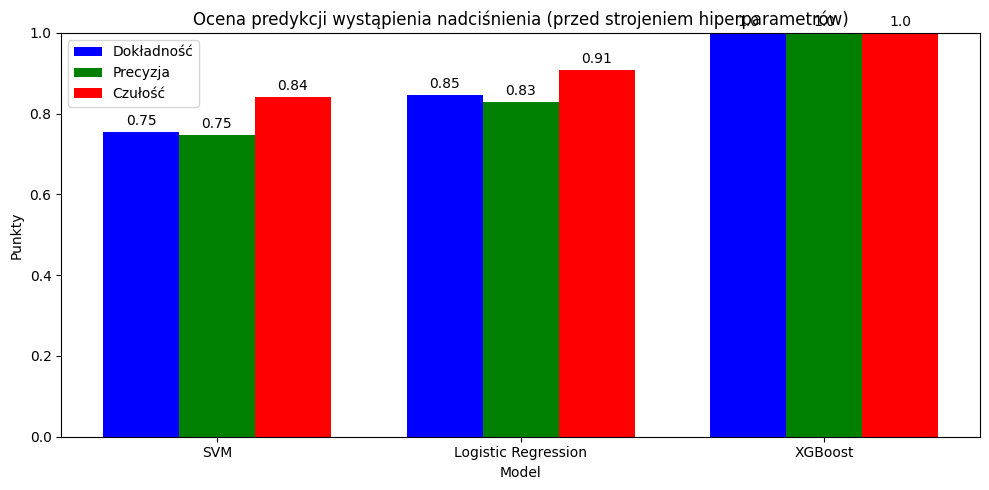

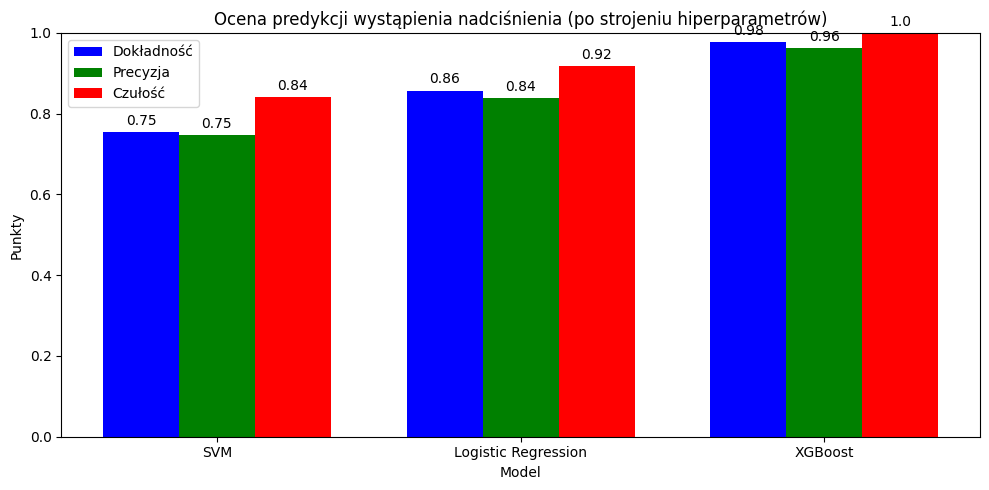

In [18]:
# Etykiety osi X
x_labels_before = ['SVM', 'Logistic Regression', 'XGBoost']
x_labels_after = ['SVM', 'Logistic Regression', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_hypertension[0:3]
accuracy_after = accuracy_hypertension[3:6]

precision_before = precision_hypertension[0:3]
precision_after = precision_hypertension[3:6]

recall_before = recall_hypertension[0:3]
recall_after = recall_hypertension[3:6]

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Dokładność', color='b')
rects2 = ax.bar(x, precision_before, width, label='Precyzja', color='g')
rects3 = ax.bar(x + width, recall_before, width, label='Czułość', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia nadciśnienia (przed strojeniem hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='b')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='g')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia nadciśnienia (po strojeniu hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

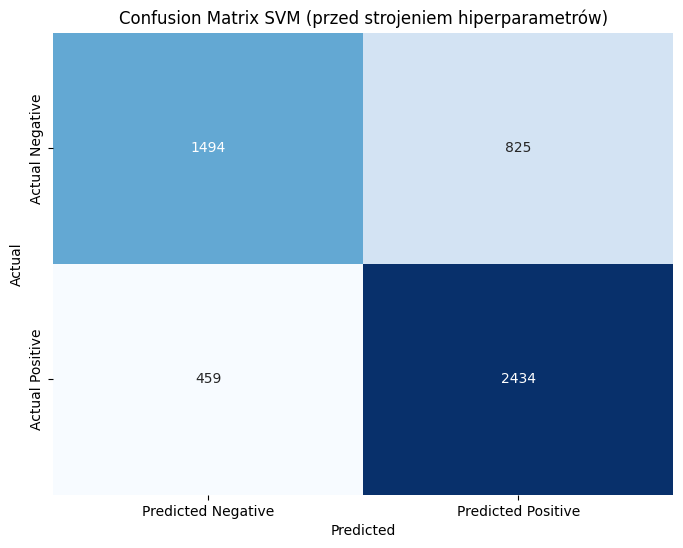

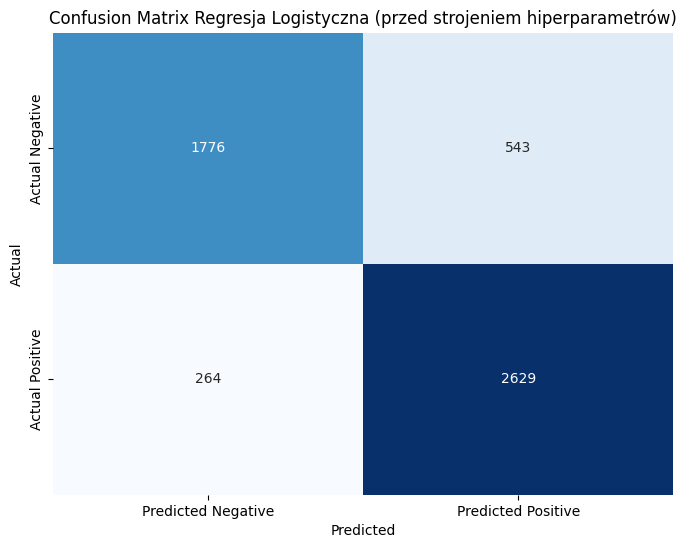

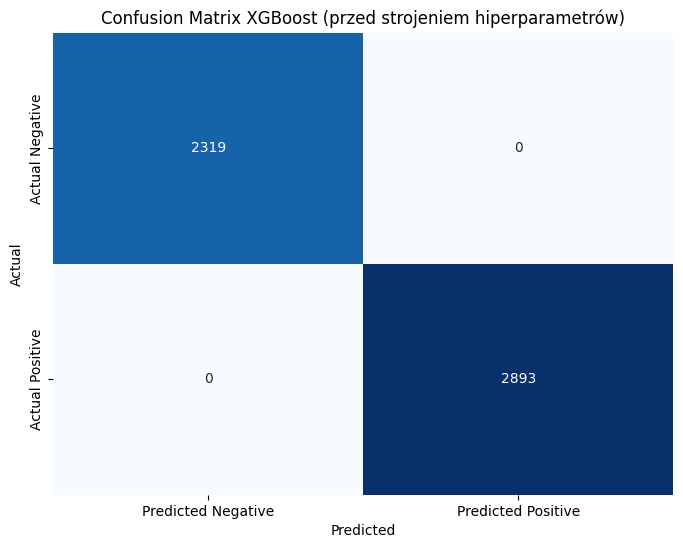

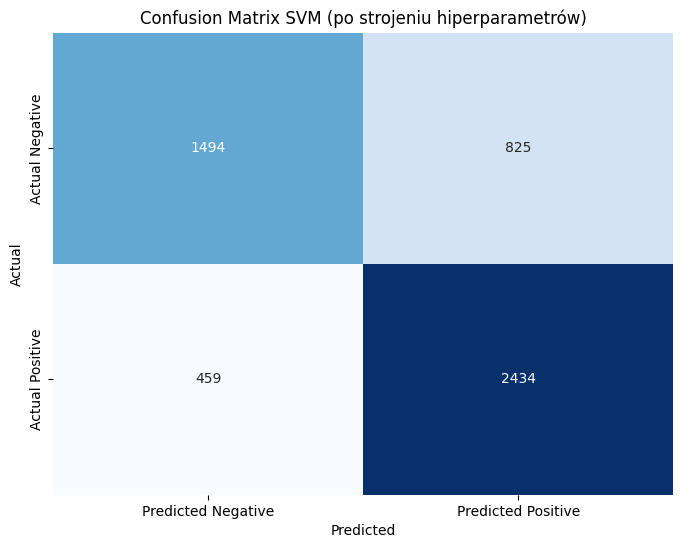

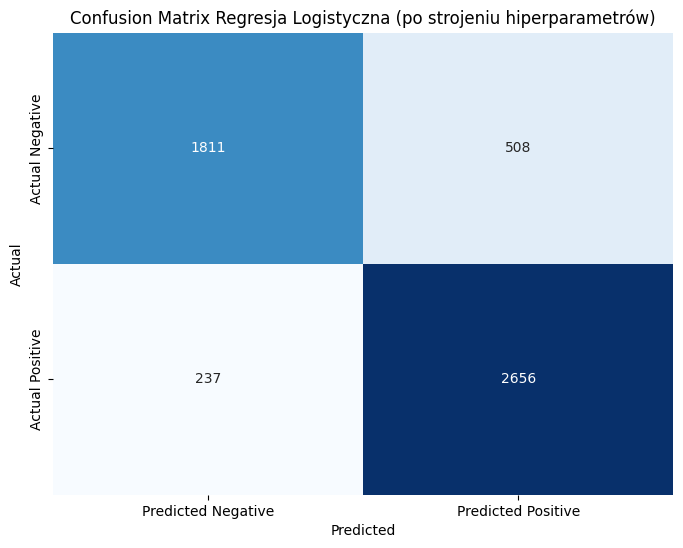

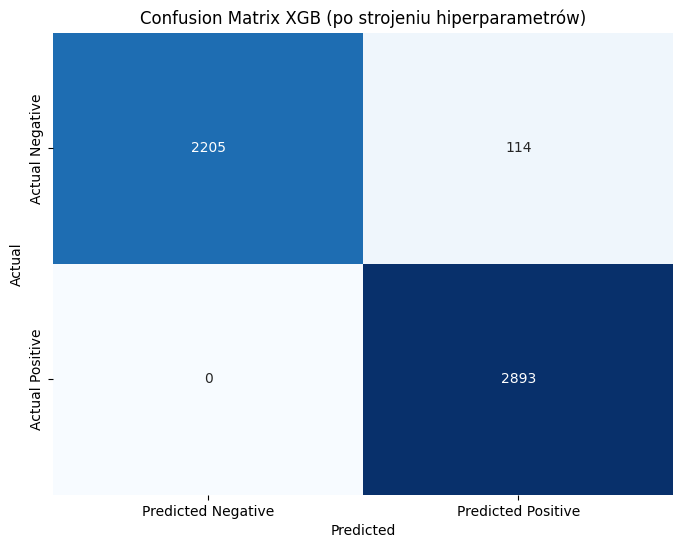

In [19]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
plot_confusion_matrix(matrix_svm_before_hypertension, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_log_before_hypertension, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_xgb_before_hypertension, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
plot_confusion_matrix(matrix_svm_after_hypertension, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_log_after_hypertension, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_xgb_after_hypertension, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')

In [ ]:
stroke = pd.read_csv("stroke_data.csv")
NaN_count = stroke.isna().sum()
stroke = stroke.dropna()

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(stroke, model_type='svm', kernel='rbf', C=1.0)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(stroke, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(stroke, model_type='xgboost', learning_rate=0.03, max_depth=5, min_child_weight=1, colsample_bytree=0.5)


print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

46.65870952606201
8.99402379989624
1.248990535736084
0.005548954010009766
0.8684227466583252
0.033574581146240234
Dokładność modelu SVM: 0.651185529210462
Dokładność modelu regresji logistycznej: 0.6825959423123931
Dokładność modelu XGBoost: 0.7976044976778294
Precyzja modelu SVM: 0.7076502732240437
Precyzja modelu regresji logistycznej: 0.7079920926292008
Precyzja modelu XGBoost: 0.8392355255761664
Czułość modelu SVM: 0.509090909090909
Czułość modelu regresji logistycznej: 0.615970515970516
Czułość modelu XGBoost: 0.7336609336609337
Macierz pomyłek modelu SVM:  [[3256  856]
 [1998 2072]]
Macierz pomyłek regresji logistycznej:  [[3078 1034]
 [1563 2507]]
Macierz pomyłek modelu XGBoost:  [[3540  572]
 [1084 2986]]


In [10]:
accuracy_stroke = [0.651185529210462, 0.678196040087998, 0.9973111708628697, 0.651185529210462, 0.6825959423123931, 0.7976044976778294]
precision_stroke = [0.7076502732240437, 0.702451394759087, 0.9946236559139785, 0.7076502732240437, 0.7079920926292008, 0.8392355255761664]
recall_stroke = [0.509090909090909, 0.6125307125307126, 1.0, 0.509090909090909, 0.615970515970516, 0.7336609336609337]
matrix_svm_before_stroke = [[3256,  856], [1998, 2072]]
matrix_log_before_stroke = [[3056, 1056], [1577, 2493]]
matrix_xgb_before_stroke = [[4090,   22], [0, 4070]]
matrix_svm_after_stroke = [[3256,  856], [1998, 2072]]
matrix_log_after_stroke = [[3078, 1034],[1563, 2507]]
matrix_xgb_after_stroke = [[3540,  572], [1084, 2986]]

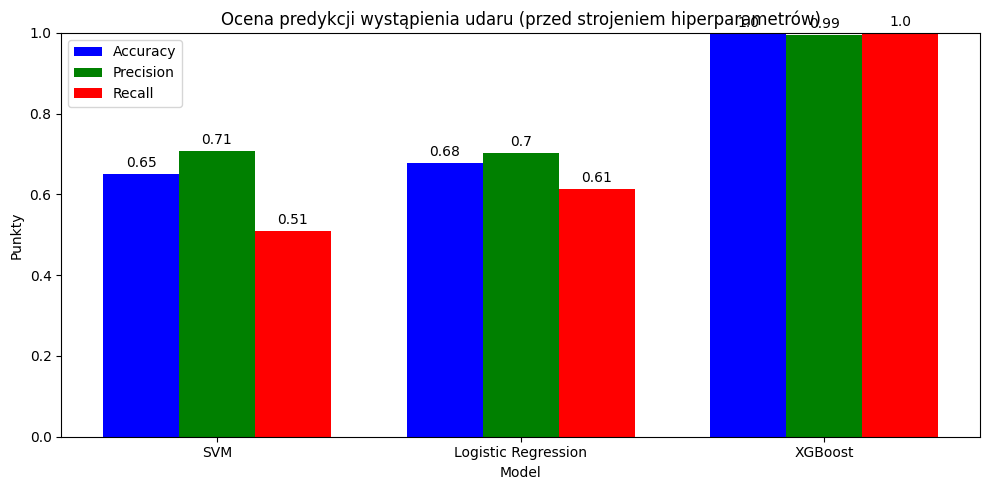

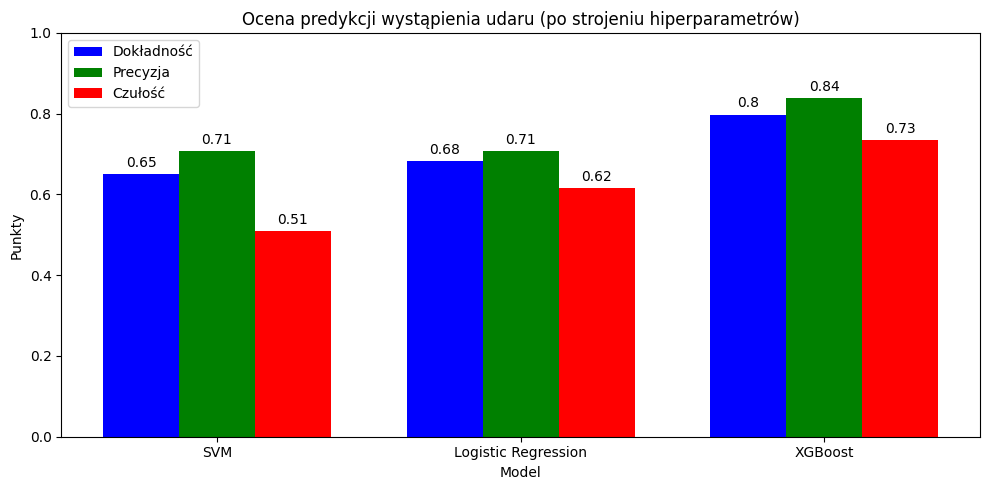

In [20]:
# Etykiety osi X
x_labels_before = ['SVM', 'Logistic Regression', 'XGBoost']
x_labels_after = ['SVM', 'Logistic Regression', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_stroke[0:3]
accuracy_after = accuracy_stroke[3:6]

precision_before = precision_stroke[0:3]
precision_after = precision_stroke[3:6]

recall_before = recall_stroke[0:3]
recall_after = recall_stroke[3:6]

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Accuracy', color='b')
rects2 = ax.bar(x, precision_before, width, label='Precision', color='g')
rects3 = ax.bar(x + width, recall_before, width, label='Recall', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia udaru (przed strojeniem hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='b')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='g')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='r')

ax.set_xlabel('Model')
ax.set_ylabel('Punkty')
ax.set_title('Ocena predykcji wystąpienia udaru (po strojeniu hiperparametrów)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

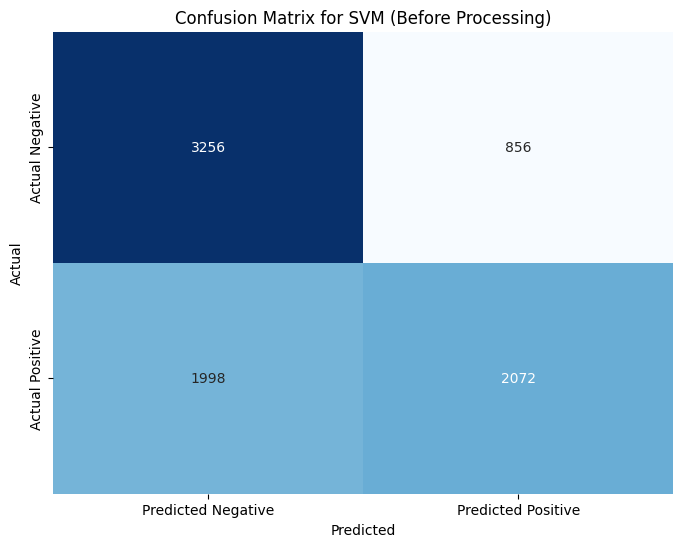

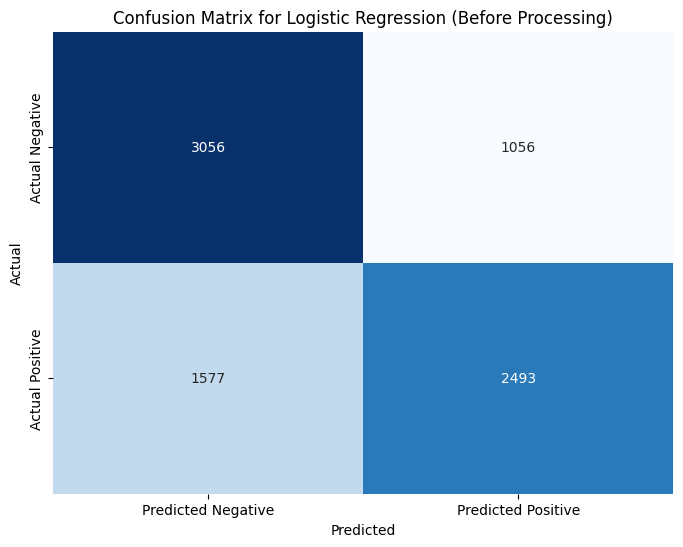

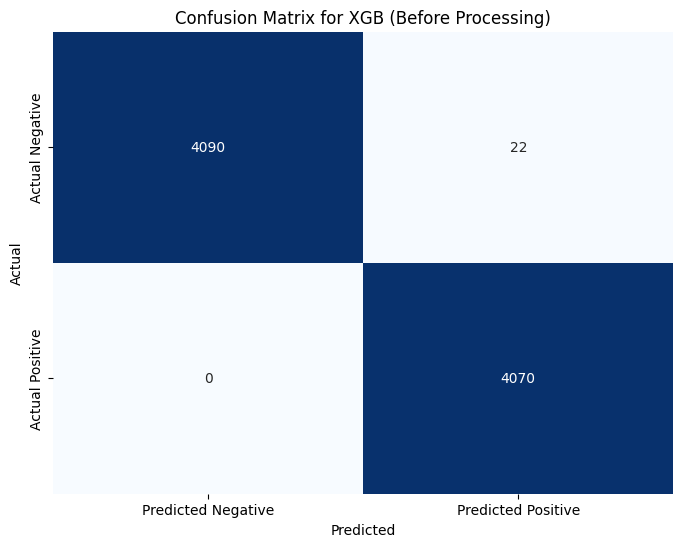

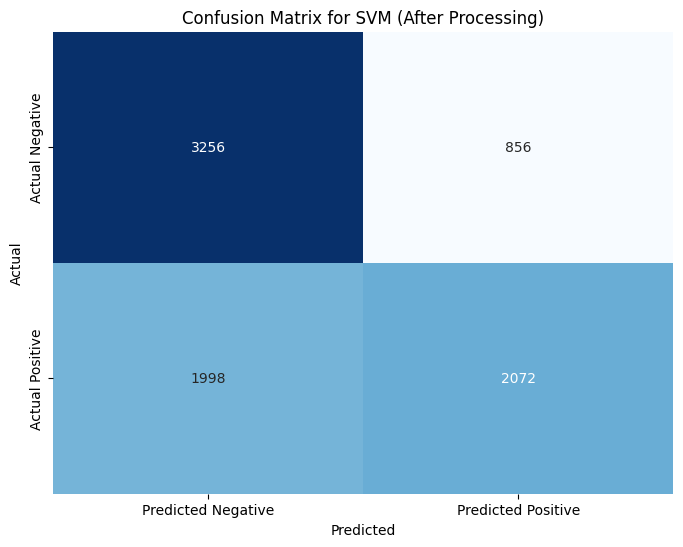

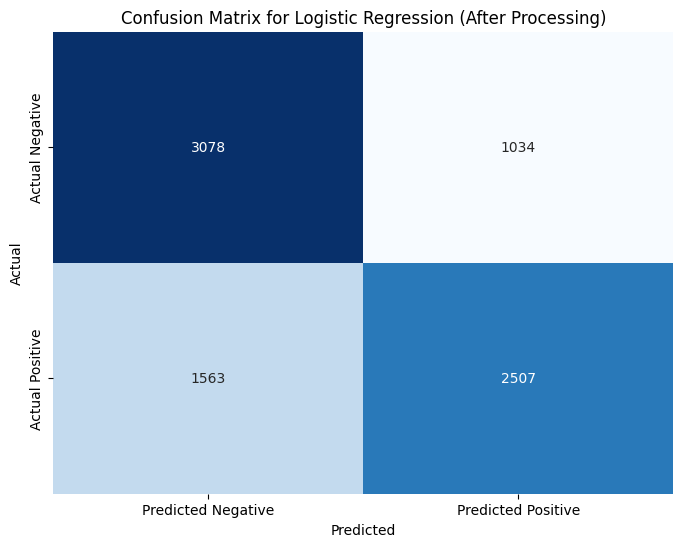

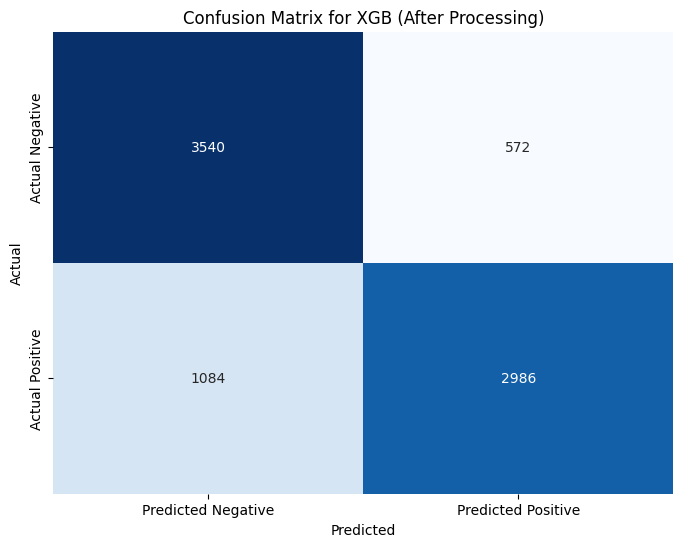

In [16]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
plot_confusion_matrix(matrix_svm_before_stroke, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_log_before_stroke, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
plot_confusion_matrix(matrix_xgb_before_stroke, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
plot_confusion_matrix(matrix_svm_after_stroke, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_log_after_stroke, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
plot_confusion_matrix(matrix_xgb_after_stroke, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')